<a href="https://colab.research.google.com/github/gauravvojha/Cognifyz_DataScience_tasks/blob/main/task1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Load the dataset and explore it

In [2]:
import pandas as pd

# Load the dataset

In [3]:
df = pd.read_csv('/content/restaurant_data.csv')

# Display the first few rows of the dataset

In [4]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas,

# Display the number of rows and columns

In [5]:
print("\nNumber of rows and columns:")
print(df.shape)


Number of rows and columns:
(4411, 21)


# Step 2: Check for missing values and handle them

In [6]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                10
Average Cost for two     1
Currency                 1
Has Table booking        1
Has Online delivery      1
Is delivering now        1
Switch to order menu     1
Price range              1
Aggregate rating         1
Rating color             1
Rating text              1
Votes                    1
dtype: int64


# Handling missing values

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        # Fill missing values with the most frequent value
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Fill missing values with the median value
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values after handling them:")
print(df.isnull().sum())


Missing values after handling them:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


# Step 3: Perform data type conversion if necessary

In [8]:
print("\nData types before conversion:")
print(df.dtypes)


Data types before conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                   float64
dtype: object


# Convert 'Aggregate rating' to float if it's not already

In [9]:
df['Aggregate rating'] = df['Aggregate rating'].astype(float)

In [10]:
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two    float64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range             float64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                   float64
dtype: object


# Step 4: Analyze the distribution of the target variable ("Aggregate rating")

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the distribution of the target variable

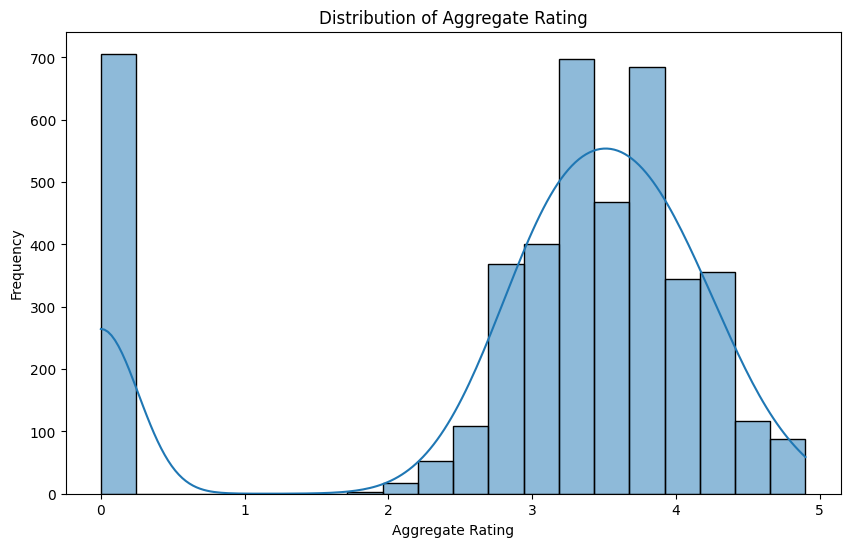

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Identify class imbalances

In [13]:
rating_counts = df['Aggregate rating'].value_counts().sort_index()
print("\nValue counts of 'Aggregate rating':")
print(rating_counts)


Value counts of 'Aggregate rating':
Aggregate rating
0.0    706
1.8      1
1.9      1
2.0      1
2.1      4
2.2     13
2.3     14
2.4     39
2.5     41
2.6     68
2.7     93
2.8    133
2.9    142
3.0    190
3.1    210
3.2    239
3.3    217
3.4    242
3.5    233
3.6    235
3.7    237
3.8    232
3.9    215
4.0    165
4.1    179
4.2    140
4.3    121
4.4     95
4.5     62
4.6     55
4.7     27
4.8     19
4.9     42
Name: count, dtype: int64


# Plot the value counts

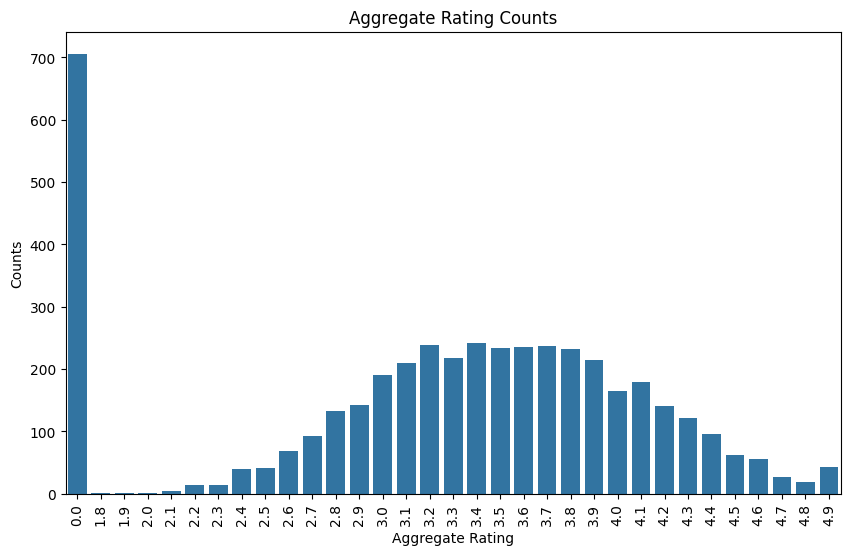

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Aggregate Rating Counts')
plt.xlabel('Aggregate Rating')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()